## Python project
*read and analyse data with panda and sklearn



In [ ]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 100mTrackResult.csv to 100mTrackResult (1).csv


In [ ]:
import io
data = io.BytesIO(uploaded["100mTrackResult.csv"])
df=pd.read_csv(data,header=0)
df.columns
df.head()


,Name,Location,Year,Medal,Nationality,Result
0,Usain BOLT,Rio,2016,1,JAM,9.81
1,Justin GATLIN,Rio,2016,2,USA,9.89
2,Andre DE GRASSE,Rio,2016,3,CAN,9.91
3,Usain BOLT,London,2012,1,JAM,9.63
4,Yohan BLAKE,London,2012,2,JAM,9.75


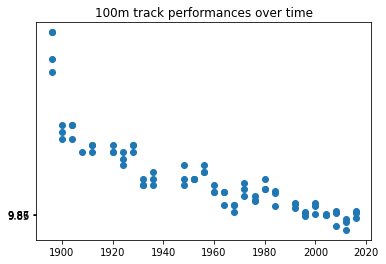

In [ ]:
plt.scatter(df.Year,df.Result)
plt.xlabel=("Year")
plt.ylabel=("Result")
plt.yticks(df.Result[9:12:1])
plt.title("100m track performances over time")


plt.show()


In [ ]:
x=np.where(df.Result<10)
print(x)
y=np.select(df.Result,

SyntaxError: ignored

polyfit eq:             3           2
-3.425e-06 x + 0.02023 x - 39.85 x + 2.617e+04


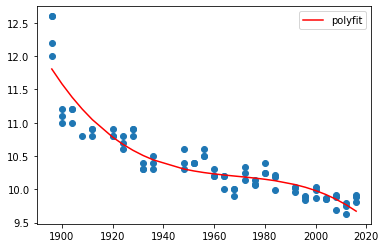

In [ ]:
#Non linear regression
from scipy.optimize import curve_fit
from matplotlib import pyplot
xx=df.Year.values
yy=df.Result.values
polymodel = np.poly1d(np.polyfit(xx, yy, 3))
print("polyfit eq:", polymodel)
plt.scatter(xx, yy)
plt.plot(xx, polymodel(xx),'r',label='polyfit')
plt.legend()
plt.show()

#pyplot.plot(x_line, y_line, '--', color='red')
#pyplot.show()


[-2.72853136e+01  3.46250074e-03  6.26351360e+01]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


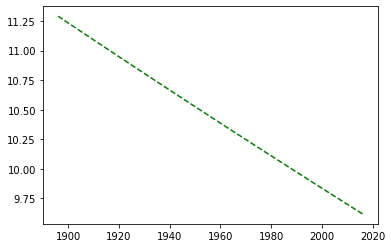

In [ ]:
def func(x, a, b, c):
    return a * np.log(b*x) + c
popt, pcov = curve_fit(func, xx, yy)
print(popt)
plt.plot(xx, func(xx, *popt), 'g--',label='curvefit')


#Pie Chart

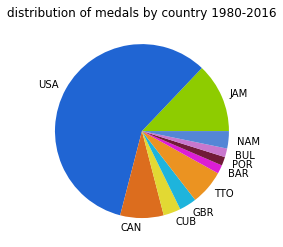

In [ ]:
df.Nationality
JAM=df.loc[df["Nationality"]=="JAM"].count()[0]
USA=df.loc[df["Nationality"]=="USA"].count()[0]
CAN=df.loc[df["Nationality"]=="CAN"].count()[0]
CUB=df.loc[df["Nationality"]=="CUB"].count()[0]
GBR=df.loc[df["Nationality"]=="CUB"].count()[0]
TTO=df.loc[df["Nationality"]=="TTO"].count()[0]
BAR=df.loc[df["Nationality"]=="BAR"].count()[0]
POR=df.loc[df["Nationality"]=="POR"].count()[0]
BUL=df.loc[df["Nationality"]=="BUL"].count()[0]
NAM=df.loc[df["Nationality"]=="NAM"].count()[0]

labels =['JAM','USA','CAN','CUB','GBR','TTO','BAR','POR','BUL','NAM']
colors=['#8ecc00','#2065d3','#dc6d1e','#e2d933','#1eb4dc','#eb9321','#dc1ed5','#711b38','#c977cd','#5486d6']
plt.title("distribution of medals by country 1980-2016")
plt.pie([JAM,USA,CAN,CUB,GBR,TTO,BAR,POR,BUL,NAM],labels=labels,colors=colors)
plt.show()





#Nationality\Medal colums predection -
assuming the other data will be sufficient enogh

In [ ]:
df.columns
xy=df[[ 'Year', 'Medal', 'Nationality','Result']]
xy.head()

,Year,Medal,Nationality,Result
0,2016,1,JAM,9.81
1,2016,2,USA,9.89
2,2016,3,CAN,9.91
3,2012,1,JAM,9.63
4,2012,2,JAM,9.75


In [ ]:
#mapping nationality to numerical values
xy.Nationality.unique()
np.arange(len(xy.Nationality.unique()))
pd.DataFrame(np.vstack([np.arange(len(xy.Nationality.unique())),xy.Nationality.unique()])).T.set_index(1).to_dict()[0]
#previous
#xy.Nationality.unique()
mapping_dict1=pd.DataFrame(np.vstack([np.arange(len(xy.Nationality.unique())),xy.Nationality.unique()])).T.set_index(1).to_dict()[0]
xy.Nationality=xy.Nationality.map(mapping_dict1)
type(xy.Nationality)
xy.head()




/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Year,Medal,Nationality,Result
0,2016,1,0,9.81
1,2016,2,1,9.89
2,2016,3,2,9.91
3,2012,1,0,9.63
4,2012,2,0,9.75


* Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x=xy[xy.columns[[0,1,3]]] 
y=xy[xy.columns[-2]] 
#print(x)
#print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn import tree
Clf = tree.DecisionTreeClassifier()
#training the model
Clf.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Clf.predict(x_test)

array([ 8,  2,  8,  8,  1,  3,  3,  1,  0,  6,  1,  1,  1,  1,  1,  0,  1,
        7,  1, 11,  2,  1,  2, 13,  1,  7,  1])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion  = confusion_matrix(Clf.predict(x_test),  y_test)
confusion

array([[ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 10,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=Clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.4074074074074074


In [ ]:
#Medal prediction 
z=xy[xy.columns[[0,2,3]]] 
w=xy[xy.columns[-3]] 
#print(z)
#print(w)
z_train, z_test, w_train, w_test = train_test_split(z, w, test_size=0.33, random_state=42)
Clf = tree.DecisionTreeClassifier()
#training the model
Clf.fit(z_train,w_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Clf.predict(z_test)


array([3, 1, 1, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 3, 2])

In [ ]:
w_test.values

array([1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 1, 2,
       3, 3, 2, 3, 1])

In [ ]:
w_pred=Clf.predict(x_test)
print("Accuracy:",accuracy_score(w_test, w_pred))

Accuracy: 0.25925925925925924


In [ ]:
from sklearn.decomposition import PCA 
algo=PCA(n_components=3)
algo.fit(xy)
print(algo)
print(algo.components_)
#our components
print(algo.explained_variance_)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[[-9.99257679e-01  1.42648523e-04  3.59220589e-02  1.39167336e-02]
 [ 3.60531853e-02  5.55139442e-02  9.97724634e-01  1.28033059e-02]
 [ 4.41919929e-04 -9.92955991e-01  5.65685947e-02 -1.04106671e-01]]
[1.37797535e+03 2.24419790e+01 6.22146526e-01]


In [ ]:
z_pca=algo.fit_transform(z_train)
z_pca, z_test, w_train, w_test = train_test_split(z, w, test_size=0.33, random_state=42)
Clf = tree.DecisionTreeClassifier()
#training the model
Clf.fit(z_pca,w_train)
Clf.predict(z_test)




array([3, 1, 1, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 3, 2])

In [ ]:
w_test.values



array([1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 1, 2,
       3, 3, 2, 3, 1])

In [ ]:
from sklearn.decomposition import NMF
algo2=NMF(n_components=3)
algo2.fit(xy)
print(algo)
print(algo2.components_)



PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[[1.32340660e+02 5.41372909e-02 0.00000000e+00 6.65044886e-01]
 [1.78377557e-04 1.09648539e-01 9.28735920e+00 3.64936244e-01]
 [0.00000000e+00 6.38131505e+00 0.00000000e+00 2.26244567e+00]]


In [ ]:
z_mnf=algo2.fit_transform(z_train)
z_mnf, z_test, w_train, w_test = train_test_split(z, w, test_size=0.33, random_state=42)
Clf.fit(z_mnf,w_train)
Clf.predict(z_test)




array([3, 1, 1, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 3, 2])

In [ ]:
w_test.values

array([1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 1, 2,
       3, 3, 2, 3, 1])